In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
import xgboost as xgb

In [7]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    Y = data['GS_close']
    X = data.drop(columns = {'GS_close', 'date'})
    train_samples = int(X.shape[0] * 0.65)
    print(train_samples)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    Y_train = Y.iloc[:train_samples]
    Y_test = Y.iloc[train_samples:]
    
    return (X_train, Y_train), (X_test, Y_test)

In [3]:
df = pd.read_csv('Final_Data.csv')

In [4]:
print(df)

            date      date.1  GS_open   GS_high  GS_low  GS_close   GS_aclose  \
0     1999-12-17  1999-12-17    80.19   80.5600   78.44     80.19   62.584489   
1     1999-12-20  1999-12-20    82.00   83.6300   80.75     81.88   63.903453   
2     1999-12-21  1999-12-21    80.63   83.0000   79.50     80.94   63.169828   
3     1999-12-22  1999-12-22    81.00   81.3800   79.13     79.69   62.194262   
4     1999-12-23  1999-12-23    81.00   82.4400   80.69     81.00   63.216655   
...          ...         ...      ...       ...     ...       ...         ...   
5371  2021-04-26  2021-04-26   341.94  345.9000  340.89    343.52  343.520000   
5372  2021-04-27  2021-04-27   344.00  347.5500  343.66    346.63  346.630000   
5373  2021-04-28  2021-04-28   348.00  350.1200  346.09    348.11  348.110000   
5374  2021-04-29  2021-04-29   350.55  353.8300  347.48    352.97  352.970000   
5375  2021-04-30  2021-04-30   351.12  352.8197  347.20    348.45  348.450000   

      GS_volume  MS_open   

In [5]:
df = df.drop(columns = 'date.1')

In [8]:
(X_train1, Y_train1), (X_test1, Y_test1) =  get_feature_importance_data(df)

3494


In [9]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=300,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train1,Y_train1, 
                         eval_set = [(X_train1, Y_train1), (X_test1, Y_test1)], 
                         verbose=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

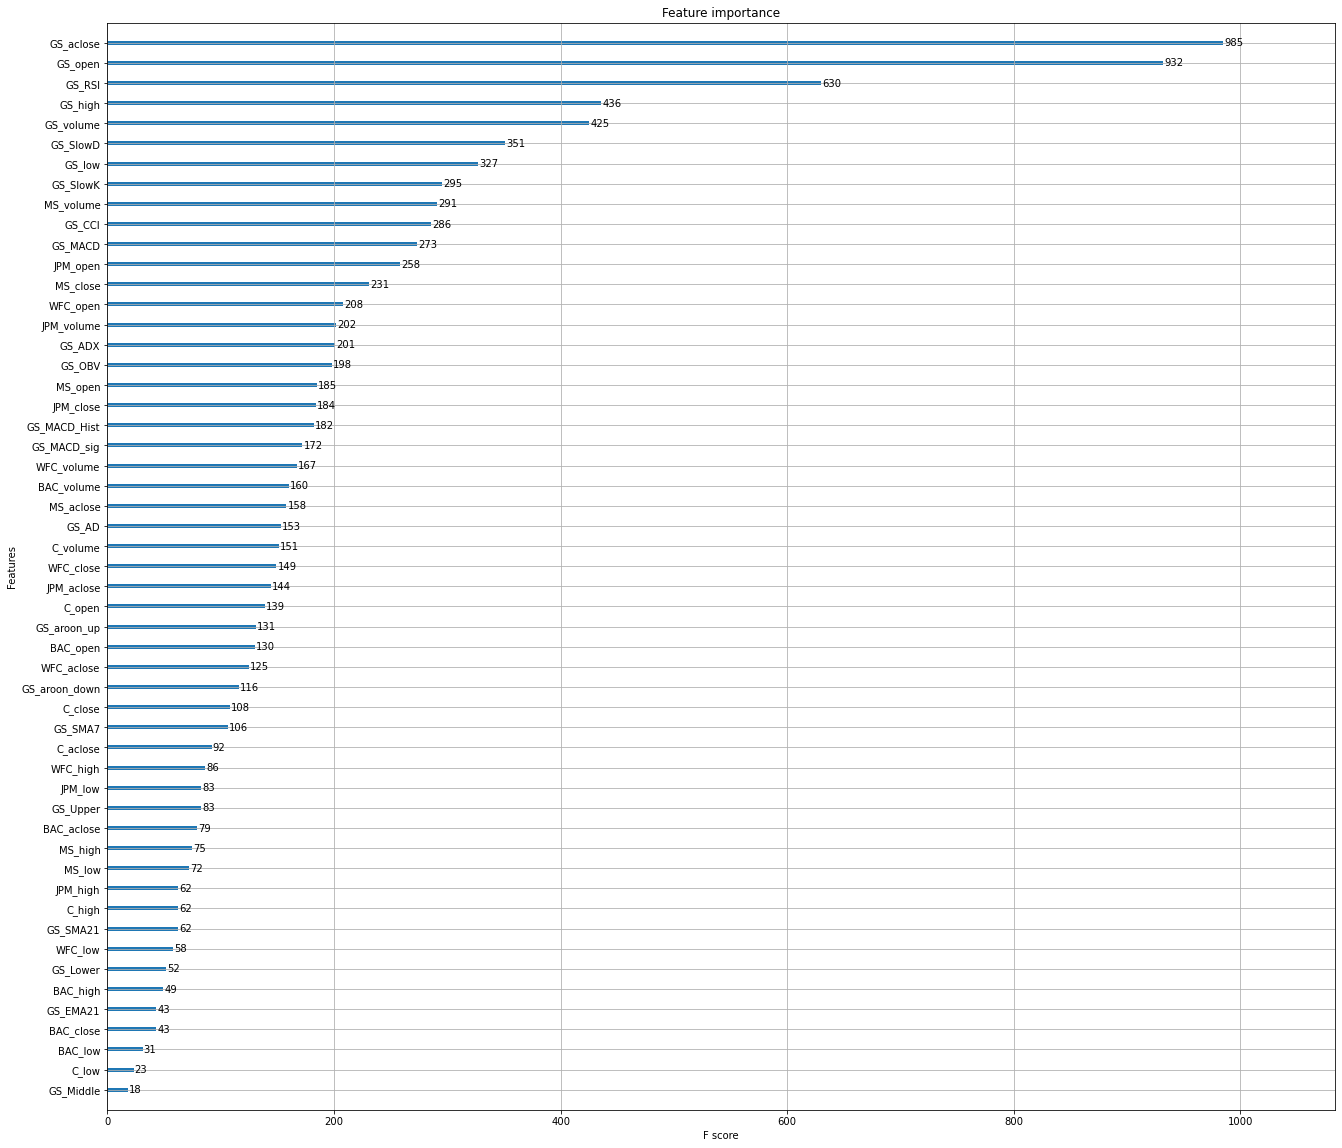

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(22,20))
xgb.plot_importance(xgbModel, ax=ax)